# Root Locus

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está en <b>borrador</b> y puede estar incompleto y/o sufrir modificaciones</font>
___

<nav style="display: flex; justify-content: space-evenly;">
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&amp;logo=GitBook&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab"><img src="https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&amp;logo=github&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab/issues"><img src="https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge"></a>
</nav>

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_04"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_06"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>

In [ ]:
%plot inline --format=png -w 1600 -h 800

In [2]:
format compact;

## Sistemas de Primer Orden sin cero

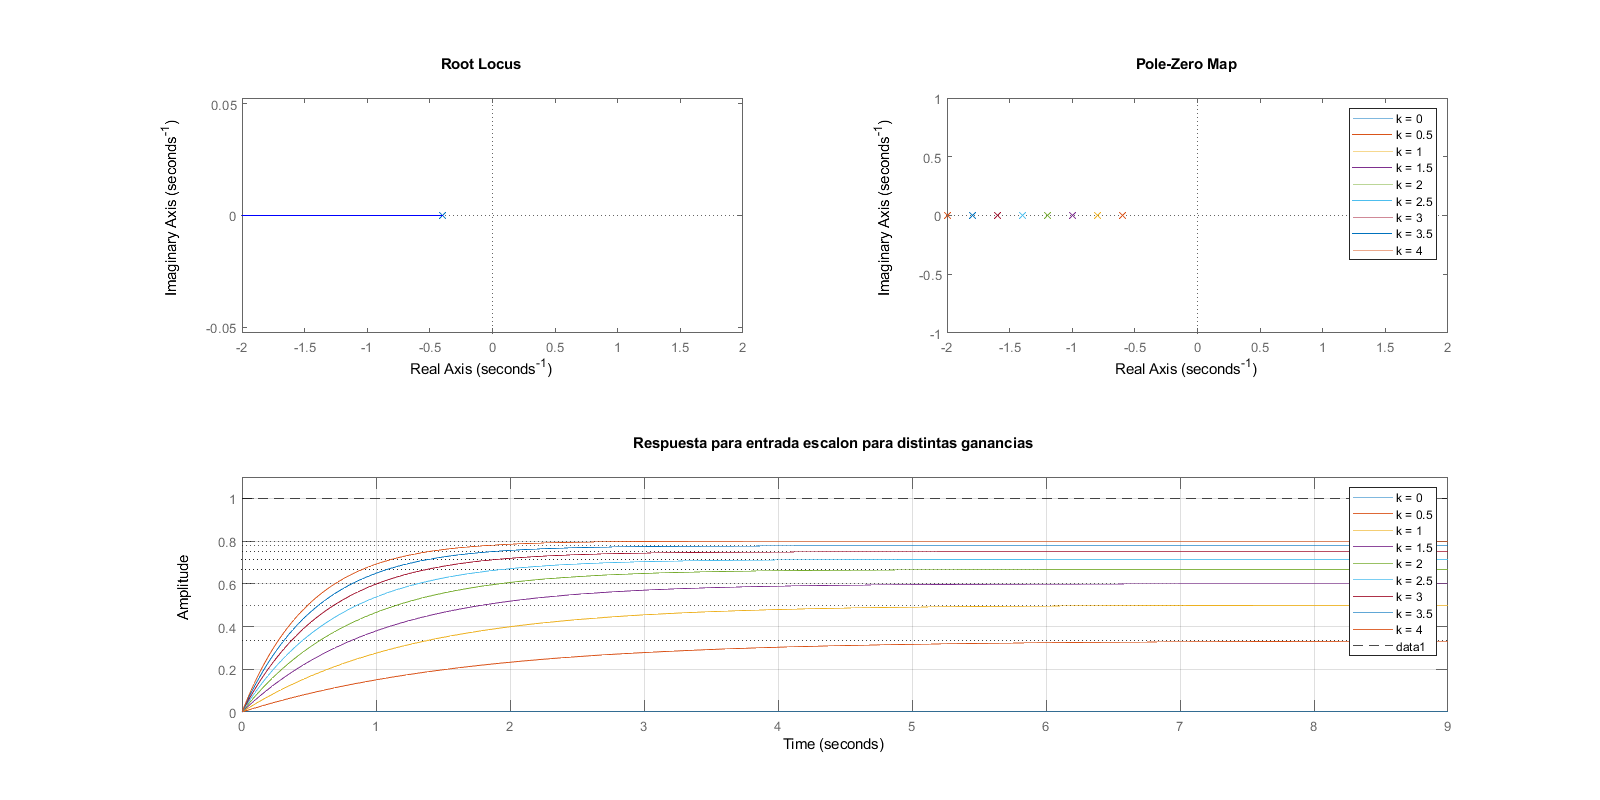

In [3]:
p = 0.4;
ganancia_valores = 0:0.5:4;
s = tf("s");

primer_orden = p/(s+p);

figure;
subplot(2,2,1);
rlocus(primer_orden)
xlim([-2 2]);


ax = subplot(2,2,2);
hold(ax, "on")
for index = 1:length(ganancia_valores)
    k = ganancia_valores(index);
    lazo_cerrado = feedback(k*primer_orden, 1);
    pzmap(lazo_cerrado)
    legendInfo{index} = ['k = ' num2str(k)]; 
end
legend(legendInfo)
xlim([-2 2]);


ax = subplot(2, 2, [3, 4]);
hold(ax, "on")

for index = 1:length(ganancia_valores)
    k = ganancia_valores(index);
    step(feedback(k*primer_orden, 1))
    legendInfo{index} = ['k = ' num2str(k)]; 
end

legend(legendInfo)
title("Respuesta para entrada escalon para distintas ganancias")
yline(1, "--k")
ylim([0, 1.1])
xlim([0 9])
grid on

## Sistemas de Primer Orden con un cero

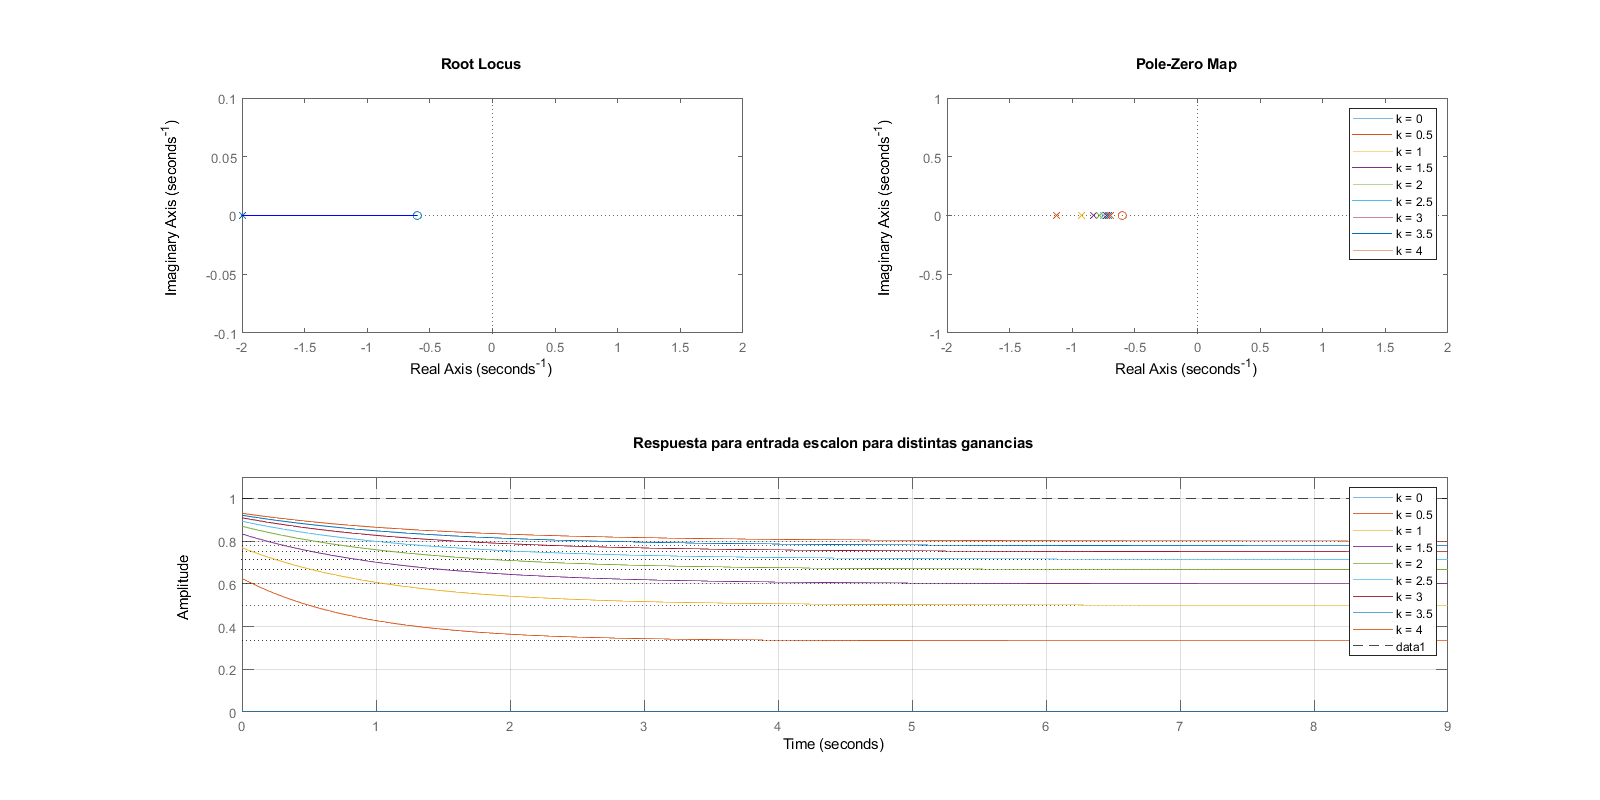

In [4]:
p = 2;
z = 0.6;
ganancia_valores = 0:0.5:4;
s = tf("s");

primer_orden = p/z * (s+z)/(s+p);

figure;
subplot(2,2,1);
rlocus(primer_orden)
xlim([-2 2]);


ax = subplot(2,2,2);
hold(ax, "on")
for index = 1:length(ganancia_valores)
    k = ganancia_valores(index);
    lazo_cerrado = feedback(k*primer_orden, 1);
    pzmap(lazo_cerrado)
    legendInfo{index} = ['k = ' num2str(k)]; 
end
legend(legendInfo)
xlim([-2 2]);


ax = subplot(2, 2, [3, 4]);
hold(ax, "on")

for index = 1:length(ganancia_valores)
    k = ganancia_valores(index);
    step(feedback(k*primer_orden, 1))
    legendInfo{index} = ['k = ' num2str(k)]; 
end

legend(legendInfo)
title("Respuesta para entrada escalon para distintas ganancias")
yline(1, "--k")
ylim([0, 1.1])
xlim([0 9])
grid on

## Casos

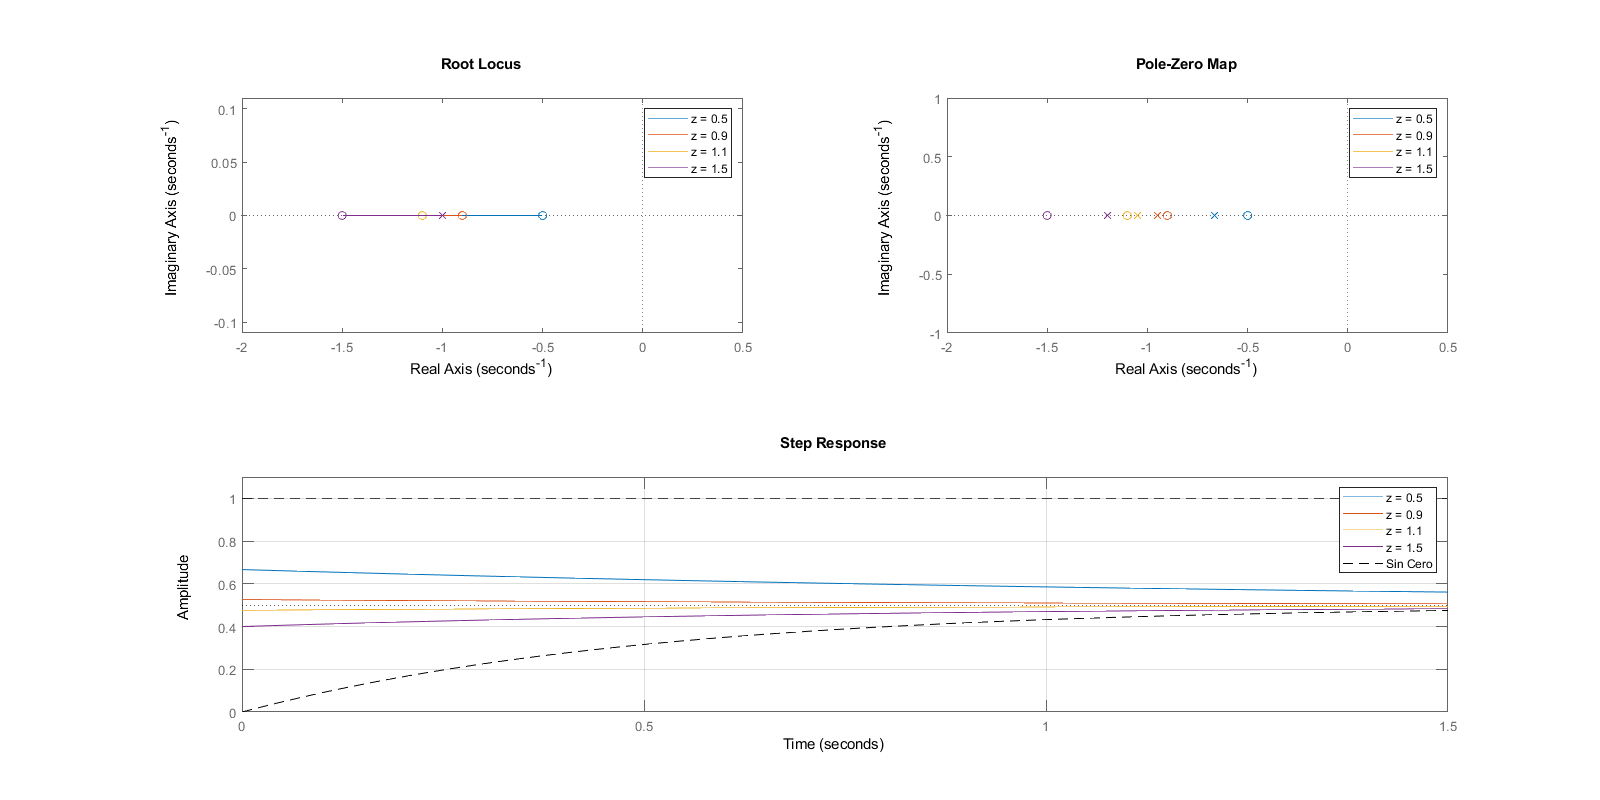

In [5]:
p = 1;
k = 1;

s = tf("s");

figure;
valores_ceros = [0.5 0.9 1.1 1.5];
for index = 1:length(valores_ceros)
    z = valores_ceros(index);
    primer_orden = p/z * (s+z)/(s+p);
    primer_orden_{index} = primer_orden;
    lazo_cerrado_{index} = feedback(k*primer_orden, 1);
    legend_info{index} = ['z = ' num2str(z)];
end

ax1 = subplot(2,2,1);
rlocus(primer_orden_{:})
xlim([-2 0.5]);


ax2 = subplot(2,2,2);
pzmap(lazo_cerrado_{:})
xlim([-2 0.5]);


ax3 = subplot(2, 2, [3, 4]);
hold(ax3, "on")
step(lazo_cerrado_{:})

primer_orden = p/(s+p);
[respuesta, tiempo] = step(feedback(k*primer_orden, 1));
plot(tiempo, respuesta, "--k")

yline(1, "--k")
ylim([0, 1.1])
xlim([0 1.5])
grid on

legend(ax1, legend_info)
legend(ax2, legend_info)

legend_info{index+1} = "Sin Cero";
legend(ax3, legend_info)

## Sistemas de Segundo Orden sin cero

In [6]:
%plot inline --format=png -w 1600 -h 500

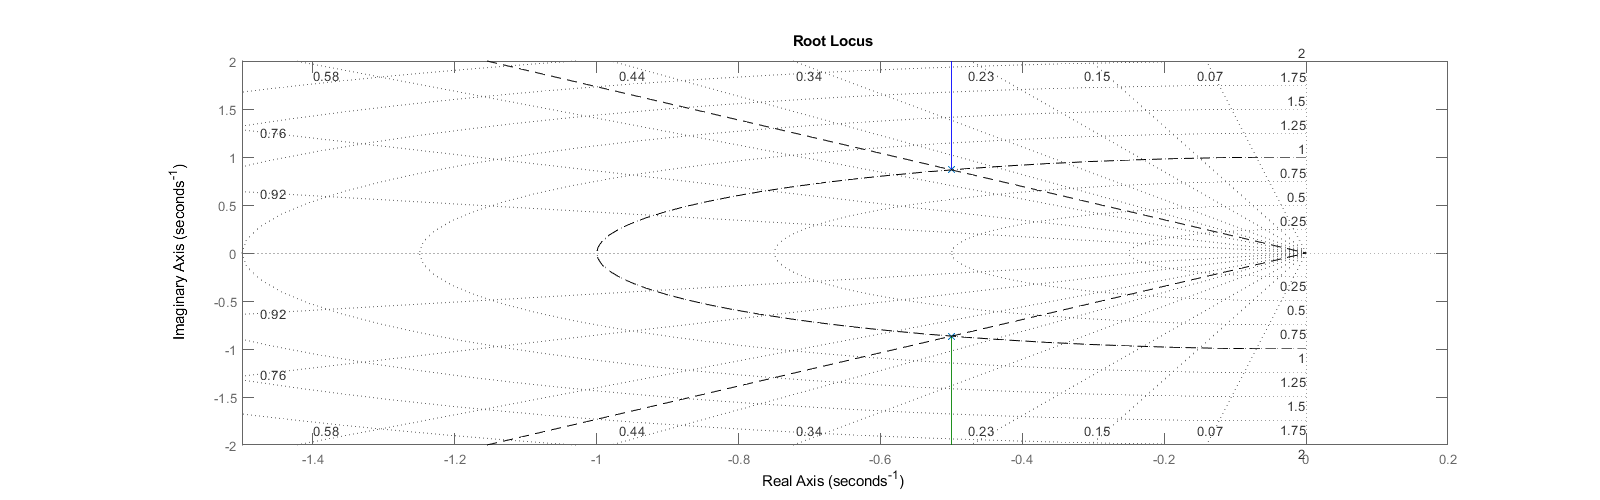

In [7]:
omega = 1;
zeta =0.5;

s = tf("s");
segundo_orden = omega^2 / (s^2 + 2*omega*zeta*s + omega^2);

figure;
hold on
rlocus(segundo_orden)
m = tan(acos(zeta)); 
x = linspace(-1.5, 0);
plot(x, m*x, '--', "Color", [0 0 0])
plot(x, -m*x, '--', "Color", [0 0 0])

th = 1/2*pi:pi/50:3/2*pi;
xunit = omega * cos(th);
yunit = omega * sin(th);
h = plot(xunit, yunit, "--k");

xlim([-1.5 0.2])
ylim([-2 2])
grid on

Lugar geométrico de las raices para distintos valores de omega

In [8]:
%plot inline --format=png -w 1600 -h 800

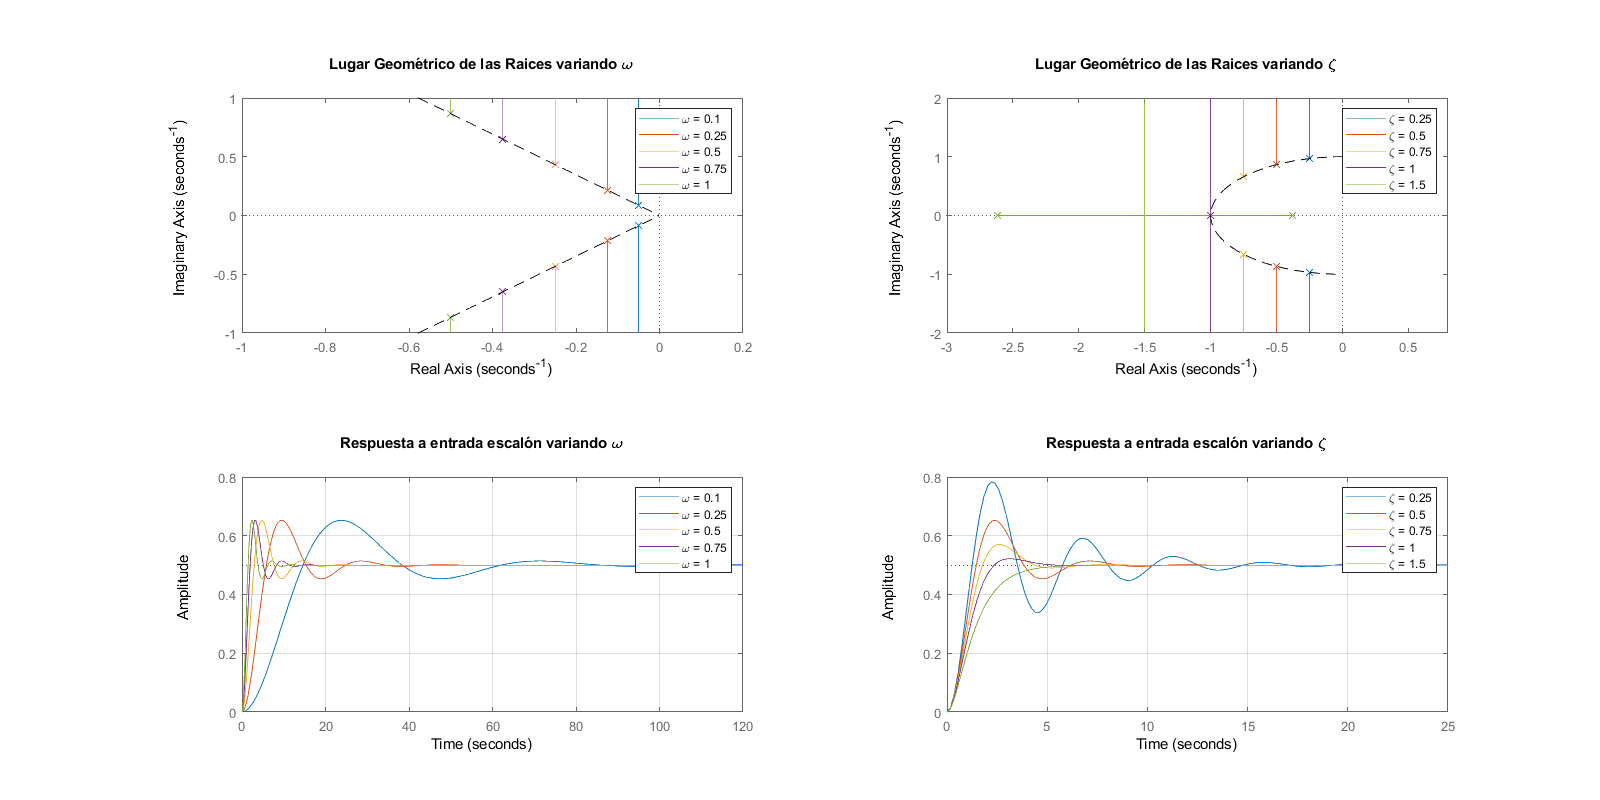

In [9]:
k = 1;

omega_values = [0.10, 0.25, 0.50, 0.75, 1.00];
legendInfo = {};
for index = 1:length(omega_values)
    omega_ = omega_values(index);
    segundo_orden = (omega_^2) / (s^2 + 2*omega_*zeta*s + omega_^2);
    segundo_orden_{index} = segundo_orden;
    lazo_cerrado_{index} = feedback(k * segundo_orden, 1);
    legendInfo{index} = ['\omega = ' num2str(omega_)]; 
end

figure;
ax1 = subplot(2,2,1);
hold(ax1, "on")
rlocus(segundo_orden_{:})
m = tan(acos(zeta)); 
x = linspace(-1, 0);
plot(x, m*x, '--', "Color", [0 0 0])
plot(x, -m*x, '--', "Color", [0 0 0])
xlim([-1 0.2])
ylim([-1 1])
legend(ax1, legendInfo, 'AutoUpdate', 'off')
title("Lugar Geométrico de las Raices variando \omega")


ax2 = subplot(2,2,3);
hold(ax2, "on")
step(lazo_cerrado_{:})
legend(ax2, legendInfo, 'AutoUpdate', 'off')
title("Respuesta a entrada escalón variando \omega")
grid on

zeta_values = [0.25, 0.50, 0.75, 1.00, 1.5];
for index = 1:length(zeta_values)
    zeta_ = zeta_values(index);
    segundo_orden = (omega^2) / (s^2 + 2*omega*zeta_*s + omega^2);
    segundo_orden_{index} = segundo_orden;
    lazo_cerrado_{index} = feedback(k * segundo_orden, 1);
    legendInfo{index} = ['\zeta = ' num2str(zeta_)]; 
end

ax2 = subplot(2,2,2);
hold(ax2, "on")
rlocus(segundo_orden_{:})

th = 1/2*pi:pi/50:3/2*pi;
xunit = omega * cos(th);
yunit = omega * sin(th);
h = plot(xunit, yunit, "--k");

xlim([-3 0.8])
ylim([-2 2])
legend(ax2, legendInfo, 'AutoUpdate', 'off')
title("Lugar Geométrico de las Raices variando \zeta")


ax4 = subplot(2,2,4);
hold(ax2, "on")
step(lazo_cerrado_{:})
legend(ax4, legendInfo, 'AutoUpdate', 'off')
title("Respuesta a entrada escalón variando \zeta")
grid on

## Sistemas de Segundo Orden con un cero

In [10]:
%plot inline --format=png -w 1600 -h 500

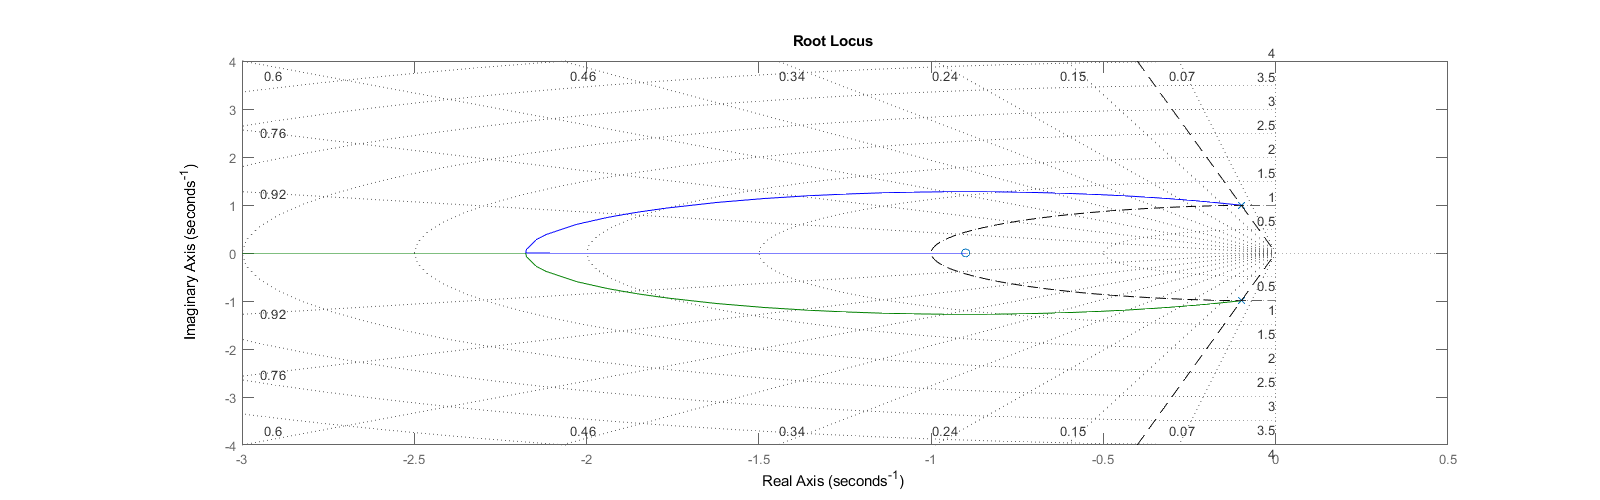

In [11]:
omega = 1;
zeta =0.1;
z = 0.9;

s = tf("s");
segundo_orden = (omega^2*(s/z+1)) / (s^2 + 2*omega*zeta*s + omega^2);

figure;
hold on;
rlocus(segundo_orden)

m = tan(acos(zeta)); 
x = linspace(-1, 0);
plot(x, m*x, '--', "Color", [0 0 0])
plot(x, -m*x, '--', "Color", [0 0 0])

th = 1/2*pi:pi/50:3/2*pi;
xunit = omega * cos(th);
yunit = omega * sin(th);
h = plot(xunit, yunit, "--k");
xlim([-3 0.5])
ylim([-4 4])
grid on

### Caso 1: Polos Reales

In [12]:
%plot inline --format=png -w 1600 -h 800

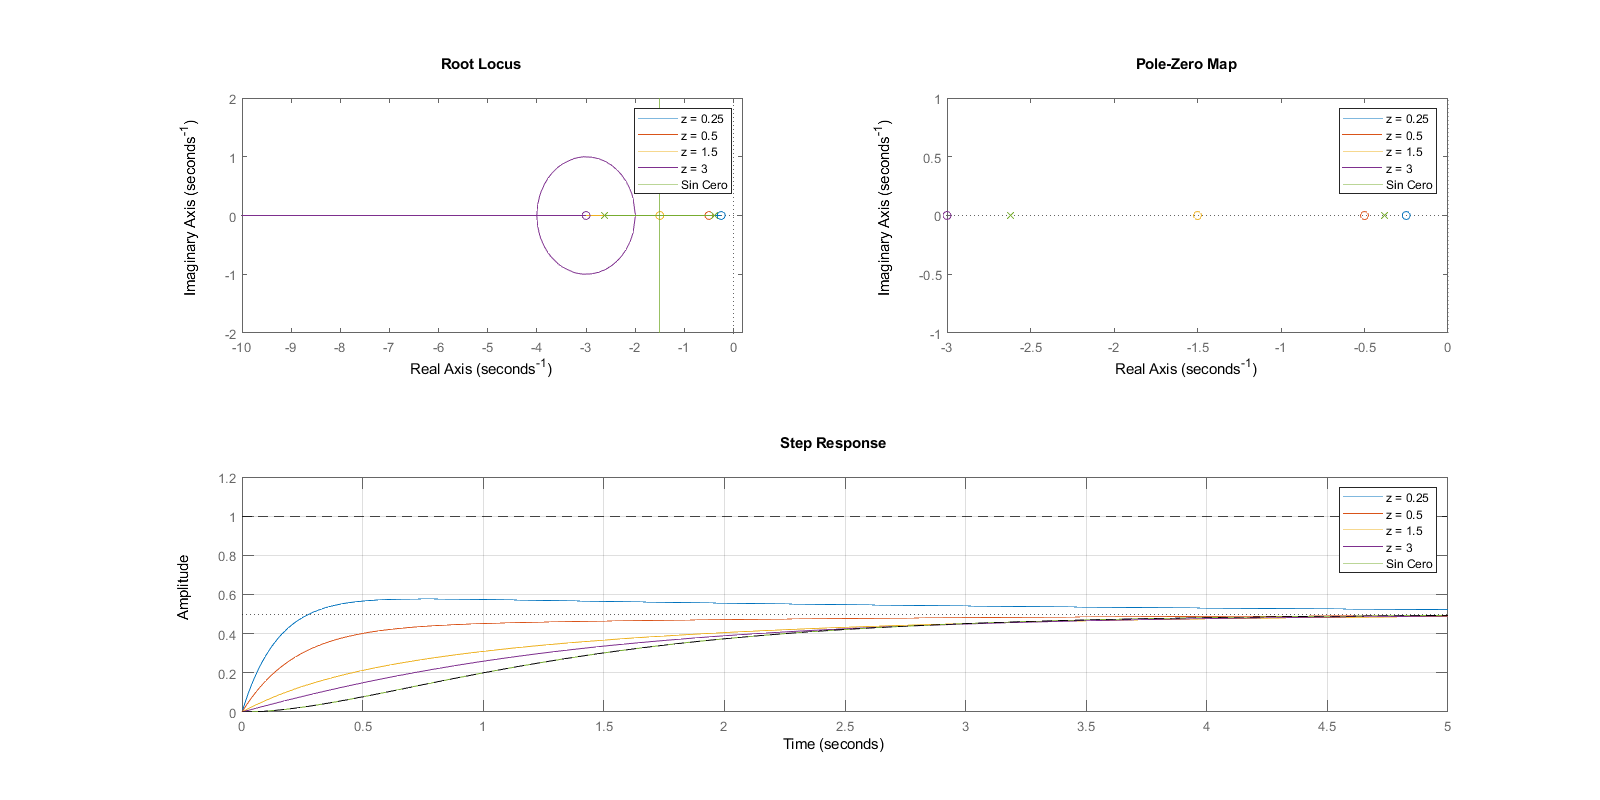

In [13]:
omega = 1;
zeta = 1.5;
k = 1;

s = tf("s");

figure;
valores_ceros = [0.25 0.5 1.5 3];
for index = 1:length(valores_ceros)
    z = valores_ceros(index);
    segundo_orden = (omega^2*(s/z+1)) / (s^2 + 2*omega*zeta*s + omega^2);
    segundo_orden_{index} = segundo_orden;
    lazo_cerrado_{index} = feedback(k*segundo_orden, 1);
    legend_info{index} = ['z = ' num2str(z)];
end

ax1 = subplot(2,2,1);
rlocus(segundo_orden_{:})
%xlim([-3 0.5]);

ax2 = subplot(2,2,2);
pzmap(segundo_orden_{:})
%xlim([-3 0.5]);

ax3 = subplot(2, 2, [3, 4]);
hold(ax3, "on")
step(lazo_cerrado_{:})

segundo_orden = omega^2 / (s^2 + 2*omega*zeta*s + omega^2);
[respuesta, tiempo] = step(feedback(segundo_orden, 1));
plot(tiempo, respuesta, "--k")

yline(1, "--k")
ylim([0, 1.2])
xlim([0 5])
grid on

legend(ax1, legend_info)
legend(ax2, legend_info)
legend_info{index+1} = "Sin Cero";
legend(ax3, legend_info)

### Caso 2: Polos Complejos

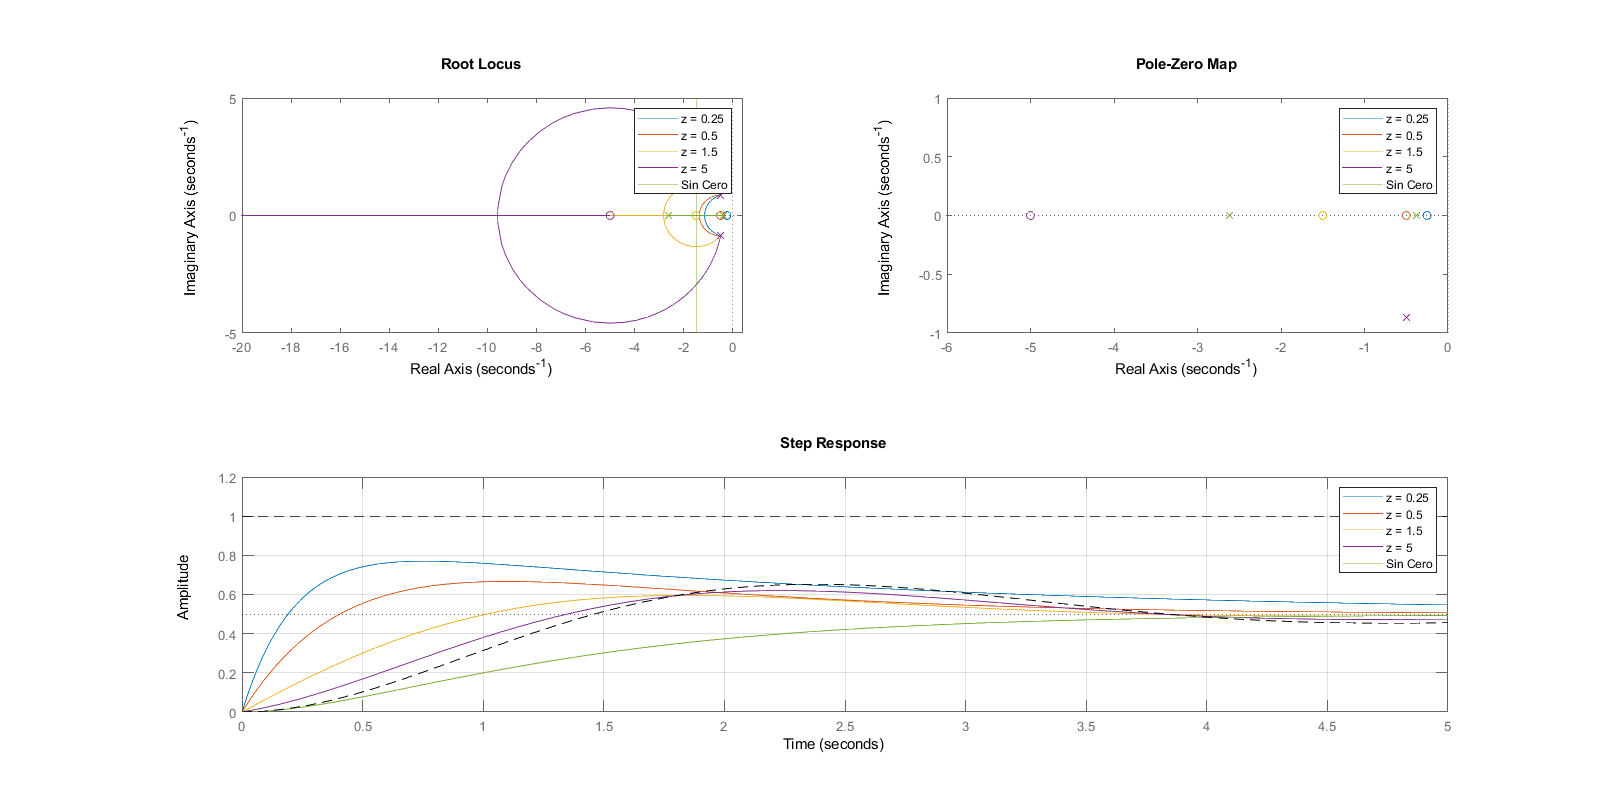

In [14]:
omega = 1;
zeta = 0.5;
k = 1;

s = tf("s");

figure;
valores_ceros = [0.25 0.5 1.5 5];
for index = 1:length(valores_ceros)
    z = valores_ceros(index);
    segundo_orden = (omega^2*(s/z+1)) / (s^2 + 2*omega*zeta*s + omega^2);
    segundo_orden_{index} = segundo_orden;
    lazo_cerrado_{index} = feedback(k*segundo_orden, 1);
    legend_info{index} = ['z = ' num2str(z)];
end

ax1 = subplot(2,2,1);
rlocus(segundo_orden_{:})
%xlim([-3 0.5]);

ax2 = subplot(2,2,2);
pzmap(segundo_orden_{:})
%xlim([-3 0.5]);

ax3 = subplot(2, 2, [3, 4]);
hold(ax3, "on")
step(lazo_cerrado_{:})

segundo_orden = omega^2 / (s^2 + 2*omega*zeta*s + omega^2);
[respuesta, tiempo] = step(feedback(segundo_orden, 1));
plot(tiempo, respuesta, "--k")

yline(1, "--k")
ylim([0, 1.2])
xlim([0 5])
grid on

legend(ax1, legend_info)
legend(ax2, legend_info)
legend_info{index+1} = "Sin Cero";
legend(ax3, legend_info)

# Gráfica de Polos y Ceros con Simulink

El gráfico de Root Locus es sólo posible dentro del ambiente de Matlab como se mostró hasta ahora, sin embargo, si se posee un modelo de simulación construido con Simulink, es posible ver los polos y ceros del sistema para **un valor de ganancia particular**.

Para ello se comienza con un modelo genérico de Simulink como el siguiente

<center><img src="images/root_locus/image_00.png"></center>

## En Lazo Abierto

Este sistema contiene una función de transferencia **propia** y sus polos y ceros pueden hallarse con las funciones **``zero``** y **``pole``**:

In [15]:
s = tf("s");
sistema = (s^2 + 2*s + 2) / (s^3 + 4*s^2 + 3*s);
ceros = zero(sistema);
polos = pole(sistema);

ceros, polos

ceros =
  -1.0000 + 1.0000i
  -1.0000 - 1.0000i
polos =
     0
    -3
    -1



Al usar Matlab, graficar estos ceros y polos es sencillo utilizando la función **``pzmap``**

In [16]:
%plot inline --format=png -w 1600 -h 500

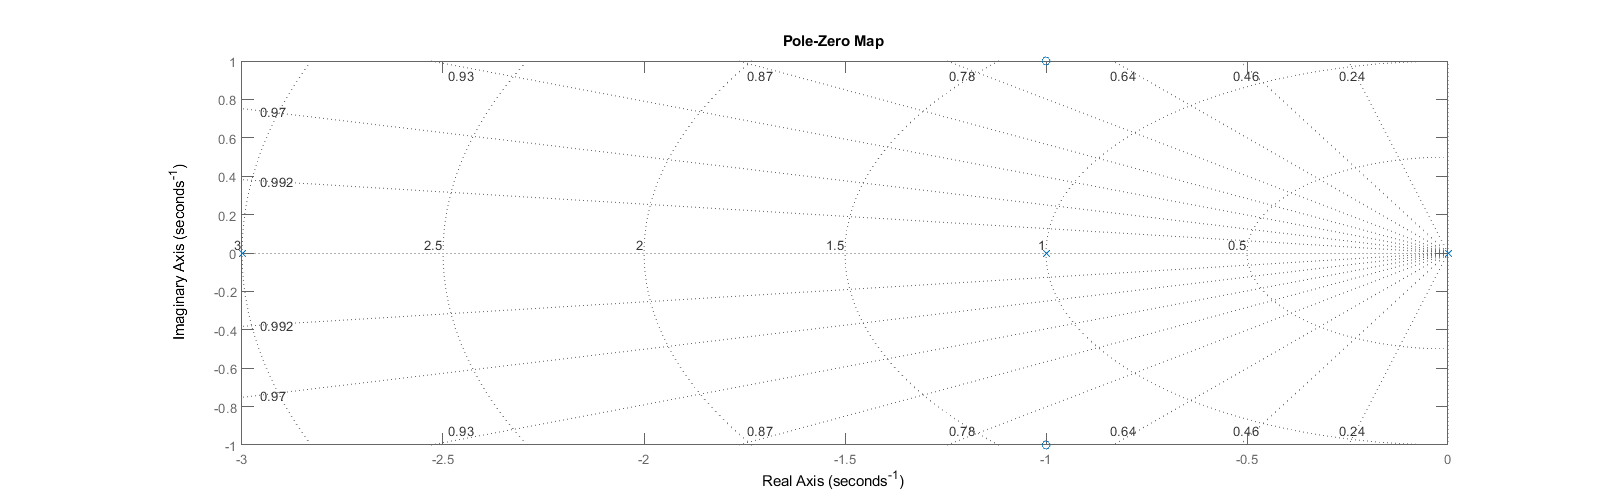

In [17]:
pzmap(sistema)
grid on

Para lograr el mismo gráfico en un modelo de Simulink, es necesario utilizar un bloque especial llamado **``Pole-Zero Plot``**

<center><img src="images/root_locus/image_01.png"></center>

Este bloque puede ubicarse en cualquier parte del modelo ya que no es necesario conectarlo con las señales de manera directa

<center><img src="images/root_locus/image_02.png"></center>

Luego, al abrirlo hay que explicitar cuál señal es la señal de entrada y cuál la de salida, esto se hace utilizando el botón **``+``**

<center><img src="images/root_locus/image_03.png"></center>

Al inicio el segundo panel estará vacio

<center><img src="images/root_locus/image_04.png"></center>

Para seleccionar una señal, basta con hacer click sobre ella en el modelo

<center><img src="images/root_locus/image_05.png"></center>

Y luego se presiona el botón **``<<``** para agregar la señal al análisis

<center><img src="images/root_locus/image_06.png"></center>

A continuación se debe configurar a la señal **``R``** como la entrada en lazo abierto y a la señal **``Y``** como la salida en lazo abierto

<center><img src="images/root_locus/image_07.png"></center>

Finalmente se presiona **``Apply``** y se tilda la opción de **``Show plot on block open``** y se presiona **``Show Plot``**

<center><img src="images/root_locus/image_08.png"></center>

Al principio el gráfico estará vacio pero, luego de correr la simulación con el **botón de play**, se generará el gráfico adecuadamente.

<center><img src="images/root_locus/image_09.png"></center>

Se comprueba visualmente como los polos y ceros están en el mismo lugar que los obtenidos en el entorno de Matlab.

<center><img src="images/root_locus/image_10.png"></center>

## En Lazo Cerrado

Al cerrar el lazo de retroalimentación, los polos y ceros cambian de posición

In [18]:
lazo_cerrado = feedback(sistema, 1)


lazo_cerrado =
 
      s^2 + 2 s + 2
  ---------------------
  s^3 + 5 s^2 + 5 s + 2
 
Continuous-time transfer function.




In [19]:
%plot inline --format=png -w 1600 -h 500

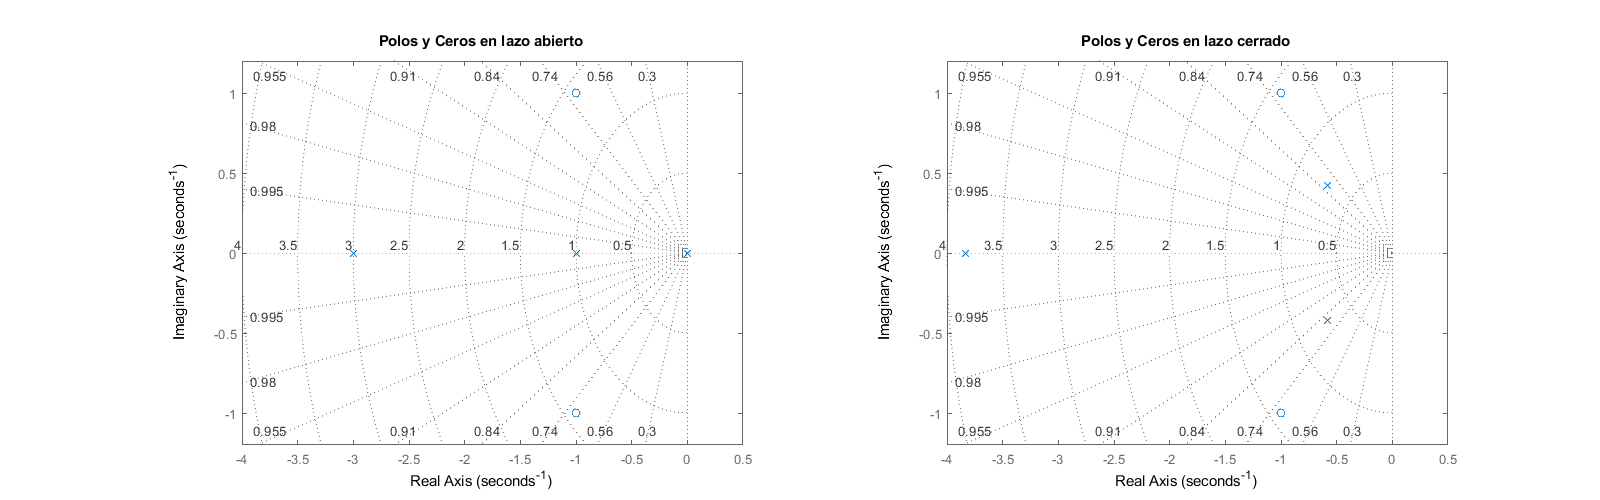

In [20]:
figure;
subplot(1, 2, 1)
pzmap(sistema)
xlim([-4 0.5])
ylim([-1.2 1.2])
title("Polos y Ceros en lazo abierto")
grid on

subplot(1, 2, 2)
pzmap(lazo_cerrado)
xlim([-4 0.5])
ylim([-1.2 1.2])
title("Polos y Ceros en lazo cerrado")

grid on

# Diseño interactivo de Root Locus con Matlab

Entender como leer un root locus es importante, pero también lo es saber que efectos tiene la adición / remoción de polos y ceros en un root locus determinado. Si bien las plantas no suelen ser modificables para agregar polos y ceros, los controladores sirven justamente para esto, permiten la incorporación de polos y ceros en lugares específicos. Para lograr esto se usa una aplicación especial dentro de Matlab llamada **``Control System Designer``** que requiere tener el **Control System Toolbox** instalado.

## Control System Designer

Para abrirla se debe ir a **``Apps > Control System Designer``** 

<center><img src="images/root_locus/image_11.png"></center>

Una vez abierta se deplegará una ventana similar a la siguiente

<center><img src="images/root_locus/image_12.png"></center>

Se deben cerrar todos los gráficos para empezar la configuración de cero

<center><img src="images/root_locus/image_13.png"></center>

## Seleccionar la arquitectura de control

El primer paso es entender la **arquitectura de control** que se va a utilizar, para ello se debe presionar **``Edit Architecture``**

<center><img src="images/root_locus/image_14.png"></center>

La arquitectura por defecto es la siguiente

<center><img src="images/root_locus/image_15.png"></center>

Donde **``G``** es la planta, **``H``** es el sensor, **``C``** es el controlador y **``F``** es la ganancia inicial. También se explicitan tres tipos de perturbaciones **``du``**, **``dy``** y **``n``** así como el error **``e``**, la entrada **``r``** y la salida **``y``**. Es posible darle valores a los bloques, aunque se asume que el único bloque modificable es C. En este notebook sólo se verán los temas referidos al root locus y no al diseño de controladores por lo que todos los valores se pueden dejar por defecto. Se debe presionar **``OK``** para cerrar la ventana.

## Agregar Root Locus

Para agregar el root locus, se debe seleccionar el **``Root Locus Editor``** dentro del menú **``Tuning Methods``** se abrirá una ventana donde no hacen falta cambios, se debe precionar **``Plot``** para continuar

<center><img src="images/root_locus/image_16.png"></center>
<center><img src="images/root_locus/image_17.png"></center>

Luego el Root Locus debería aparecer en la ventana principal

<center><img src="images/root_locus/image_18.png"></center>

## Agregar Respuesta en el tiempo y error

### Respuesta en el tiempo

Otros dos gráficos relevantes son la salida en el tiempo ante una entrada escalón y el error en el tiempo ante una entrada del mismo tipo.

Para agregar estos gráfico se debe ir a **``New Plot``** y luego a **``New Step``**

<center><img src="images/root_locus/image_19.png"></center>

Para la gráfica de la **salida** en función de la **entrada** es necesario aclarar que se quiere desde la señal **R** a la señal **Y**, luego se presiona Plot para agregar el gráfico. El gráfico debería aparecer en la ventana principal.

<center><img src="images/root_locus/image_20.png"></center>
<center><img src="images/root_locus/image_21.png"></center>

Como el sistema aún no tiene definido ni polos ni ceros, la entrada es un escalón unitario y la salida es un escalón unitario atenuado con amplitud de 0.5

### Error en función del tiempo

Para el caso del error los pasos son similares, pero no existe en el menú de **``New Step``** un gráfico asociado a **``r2e``**, que sería el error en función de la entrada. No obstante esta combinación puede agregarse seleccionando **``New Input-Output Transfer Response``**. Al seleccionarlo la pantalla cambiará, permitiéndo especificar señales de entrada y de salida.

<center><img src="images/root_locus/image_22.png"></center>
<center><img src="images/root_locus/image_23.png"></center>

Se debe seleccionar **``r``** como entrada y **``e``** como salida y luego presionar **``Plot``**

<center><img src="images/root_locus/image_24.png"></center>

Se agregará otro gráfico a la ventana principal, que en este caso será igual al anterior ya que el error se mantiene constante en 0.5. 

A continuación se acomodan las pestañas de los gráficos para poder mostrar tanto el root locus como ambas salidas al mismo tiempo. Para acomodar las vistas, basta con arrastrar y soltar.

<center><img src="images/root_locus/image_25.png"></center>

## Editando el Root Locus Dinámicamente con la interfaz gráfica

Ahora es posible modificar el root locus y ver como las salidas cambian. para ello basta con hacer click en el gráfico de root locus y luego ir a la pestaña de **``Root Locus Editor``**

<center><img src="images/root_locus/image_26.png"></center>

Utilizando los botones se pueden agregar polos y ceros reales, polos y ceros complejos y borrar los ya agregados.

También es posible hacerlo al ver el menú contextual que se despliega al hacer click derecho sobre el gráfico del root locus. En este caso se suman las opciones de agregar un controlador integral (**``Integrator``**), un controlador derivativo (**``Differentiator``**) y tres tipos de compensadores **``Lead``**, **``Lag``** y **``Notch``**.

- El Integrador agrega un **polo** en el **origen**
- El derivativo agrega un **cero** en el **origen**
- El Lead agrega un **polo** y un **cero**, con el **cero** más cerca del **origen** que el **polo**
- El Lag agrega un **polo** y un **cero**, con el **polo** más cerca del **origen** que el **cero**
- El Notch agrega **dos polos complejos** y **dos ceros complejos**, con los **ceros** más cerca del **origen** que los **polos**

<center><img src="images/root_locus/image_27.png"></center>

Un ejemplo de sistema podría ser

<center><img src="images/root_locus/image_28.png"></center>

Que emula a una planta de segundo orden con dos polos complejos con un controlador PID. 

**La parte más importante de esta herramienta es que todos los polos y ceros agregados (cruces y cículos) así como las ganancias (cuadrados púrpuras) pueden arrastrarse y soltarse en los diferentes puntos del root locus, y es posible ver como la forma del root locus y las salidas en el tiempo cambian al hacerlo. Además, pueden verse las características de las gráficas con forme se modifica el root locus**

## Editando el Root Locus Dinámicamente con el editor de compensador

Otra manera de editar el root locus es ingresar los valores exactos directamente, para ello, se debe hacer click derecho en el **Root Locus** y luego en "**``Edit Compensator...``**"


<center><img src="images/root_locus/image_29.png"></center>

Esta opción abre una nueva ventana donde uno puede editar los valores de cada polo y cero y también agregar nuevos o borrar los actuales haciendo click derecho. Las opciones para agregar polos y ceros son las mismas que en la gráfica del Root Locus


<center><img src="images/root_locus/image_30.png"></center>
<center><img src="images/root_locus/image_31.png"></center>

Algunas características interesantes de esta vista de editor son:

- Se puede ver el valor de la ganancia y la forma de la función de transferencia asociada al root locus mostrado: 

    <center><img src="images/root_locus/image_32.png"></center>
    
- En el caso de los polos y ceros **complejos** se pueden especificar de manera rectangular (con parte real e imaginaria) o de manera polar (con frecuencia natural y coeficiente de amortiguamiento) 

    <center><img src="images/root_locus/image_33.png"></center>

## Referencias y Recursos Útiles

- [Serie de videos sobre Root Locus by Brian Douglas](https://www.youtube.com/watch?v=CRvVDoQJjYI&list=PLUMWjy5jgHK3-ca6GP6PL0AgcNGHqn33f)

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_04"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_06"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>